1 - Importando bibliotecas e visualizando os dados da planilha.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

tabela = pd.read_excel("ES_nor_sud.xlsx")
display(tabela)

,REGIAO,AREA,QTD_CURSOS,QTD_VAGA_TOTAL,ING_18_24,ING_25_29,ING_30_34,ING_35_39,ING_40_49,ING_50_59,ING_60+
0,Norte,Arquitetura e planejamento urbano,1,110,11,1,2,0,0,0,0
1,Norte,Arquitetura e planejamento urbano,1,191,7,1,1,0,0,0,0
2,Norte,Arquitetura e planejamento urbano,0,0,0,0,0,0,1,0,0
3,Norte,Arquitetura e planejamento urbano,1,205,26,4,2,2,1,0,0
4,Norte,Arquitetura e planejamento urbano,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
160057,Sudeste,Veterinária,1,75,40,5,7,8,8,2,1
160058,Sudeste,Veterinária,1,286,120,6,3,2,3,0,0
160059,Sudeste,Veterinária,1,171,102,23,16,16,11,3,0
160060,Sudeste,Veterinária,1,155,86,9,9,8,11,1,0


2 - Analisando a quantidade de cursos ofertados por região.

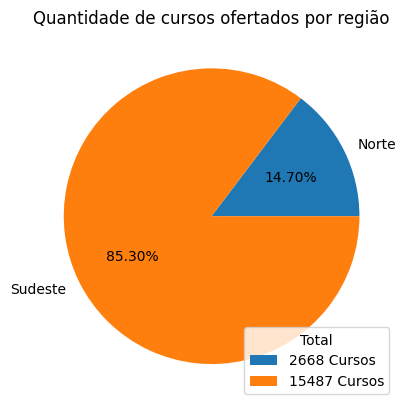

In [2]:
cur_regiao = tabela.groupby('REGIAO')['QTD_CURSOS'].sum()

regiao = cur_regiao.index.tolist() # Lista com os nomes das regiões
qtd_cursos = cur_regiao.values.tolist() # Lista com os valores da soma de cursos por região

# Desenhando o gráfico
plt.title("Quantidade de cursos ofertados por região")
plt.pie(qtd_cursos, labels=regiao, autopct="%1.2f%%")
plt.legend([f'{qtd} Cursos' for qtd in qtd_cursos], title='Total', loc='lower right')
plt.savefig("Gráfico_Cursos_Ofertados.png")
plt.show()

3 - Analisando a quantidade de vagas ofertadas por região.

<function matplotlib.pyplot.show(close=None, block=None)>

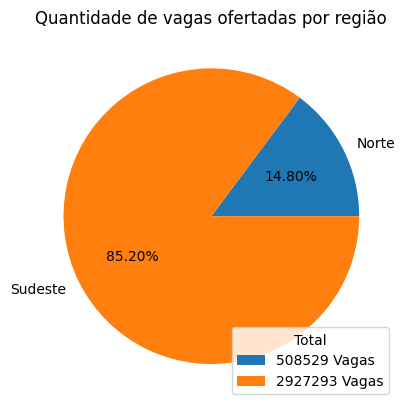

In [3]:
vgs_regiao = tabela.groupby('REGIAO')['QTD_VAGA_TOTAL'].sum()

regiao = vgs_regiao.index.tolist() # Lista com os nomes das regiões
qtd_vagas = vgs_regiao.values.tolist() # Lista com os valores da soma de cursos por região

# Desenhando o gráfico
plt.title("Quantidade de vagas ofertadas por região")
plt.pie(qtd_vagas, labels=regiao, autopct="%1.2f%%")
plt.legend([f'{qtd} Vagas' for qtd in qtd_vagas], title='Total', loc='lower right')
plt.savefig("Gráfico_Vagas_Ofertadas.png")
plt.show

4 - Analisando a faixa etária dos ingressantes no Ensino Superior.

C:\Users\felip\AppData\Local\Temp\ipykernel_7264\2471626852.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Faixa Etária', y='Quantidade de Ingressos', data=df_faixa_etaria, palette=palette)


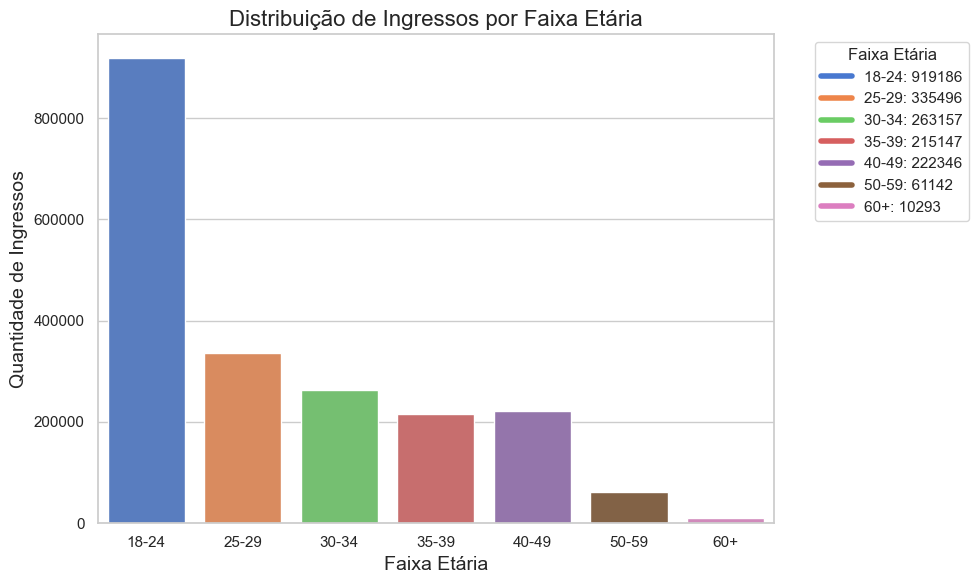

In [4]:
# Configurando o estilo do gráfico
sns.set(style="whitegrid")  # Fundo branco com linhas de grade

# Definindo as faixas etárias e somando a quantidade de ingressos
idades = ['18-24', '25-29', '30-34', '35-39', '40-49', '50-59', '60+']
faixa_etaria = tabela[["ING_18_24", "ING_25_29", "ING_30_34", "ING_35_39", "ING_40_49", "ING_50_59", "ING_60+"]].sum()

# Criando um DataFrame com as faixas etárias e quantidades
df_faixa_etaria = pd.DataFrame({
    'Faixa Etária': idades,
    'Quantidade de Ingressos': faixa_etaria
})

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))  # Tamanho do gráfico
palette = sns.color_palette("muted", n_colors=len(df_faixa_etaria))  # Paleta de cores
ax = sns.barplot(x='Faixa Etária', y='Quantidade de Ingressos', data=df_faixa_etaria, palette=palette)

# Adicionando a legenda com os valores
handles = [plt.Line2D([0], [0], color=palette[i], lw=4) for i in range(len(df_faixa_etaria))]
labels = [f'{idade}: {quantidade}' for idade, quantidade in zip(idades, faixa_etaria)]
plt.legend(handles=handles, labels=labels, title='Faixa Etária', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title("Distribuição de Ingressos por Faixa Etária", fontsize=16)
plt.xlabel("Faixa Etária", fontsize=14)
plt.ylabel("Quantidade de Ingressos", fontsize=14)
plt.tight_layout()
plt.savefig("Gráfico_Faixa_Etária.png")
plt.show()

5 - Analisando a quantidade de vagas ofertadas por região para os 5 cursos mais concorridos.

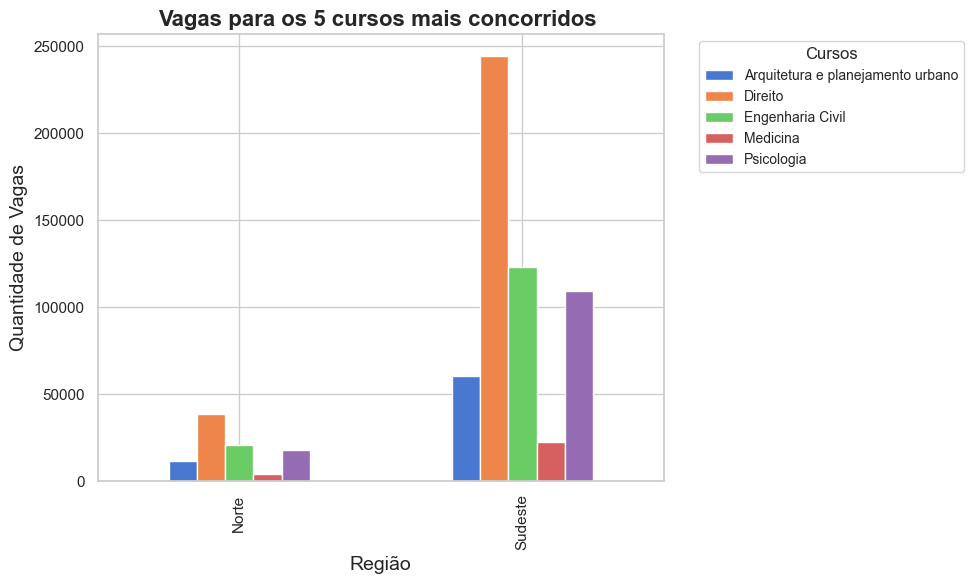

In [5]:
# Configurando o estilo do gráfico usando o seaborn
sns.set(style="whitegrid")  # Estilo de fundo com grade leve

cursos = ['Arquitetura e planejamento urbano', 'Direito', 'Engenharia Civil', 'Medicina', 'Psicologia']

# Filtrando os cursos de interesse na tabela
cur_concorridos = tabela[tabela['AREA'].isin(cursos)]

vgs_cur_regiao = cur_concorridos.groupby(['REGIAO', 'AREA'])['QTD_VAGA_TOTAL'].sum().unstack()

# Desenhando o gráfico de barras
vgs_cur_regiao.plot(kind='bar', figsize=(10, 6), color=sns.color_palette("muted"))

plt.title("Vagas para os 5 cursos mais concorridos ", fontsize=16, fontweight='bold')
plt.xlabel("Região", fontsize=14)
plt.ylabel("Quantidade de Vagas", fontsize=14)
plt.legend(title="Cursos", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title_fontsize='12')
plt.tight_layout() # Ajustando o espaçamento para evitar cortes nas labels
plt.savefig("Gráfico_Cinco_Cursos.png")
plt.show()